In [11]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
from memflow.read_data import dataset_all

In [4]:
root ="/work/dvalsecc/MEM/datasets/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1"


In [5]:
data = dataset_all.DatasetCombined(root, dtype=torch.float64,
                                    reco_list=['scaledLogRecoParticles', 'mask_lepton',
                                                'mask_jets','mask_met',
                                                'mask_boost', 'data_boost'],
                                    parton_list=['data_higgs_t_tbar_ISR',
                                                 'logScaled_data_higgs_t_tbar_ISR',  
                                                 'flattening_weight_HEta_tHadEta_tLepEta'])


RecoLevel
Reading reco_level Files
Load scaledLogRecoParticles

PartonLevel
Reading parton_level Files
Load logScaled_data_higgs_t_tbar_ISR



In [6]:
train_loader = DataLoader(dataset=data, shuffle=True, batch_size=512)

In [7]:
 (partons,
            logScaled_partons, weight_event,
            logScaled_reco, mask_lepton_reco, 
            mask_jets, mask_met, 
             mask_boost_reco, data_boost_reco) = next(iter(train_loader))

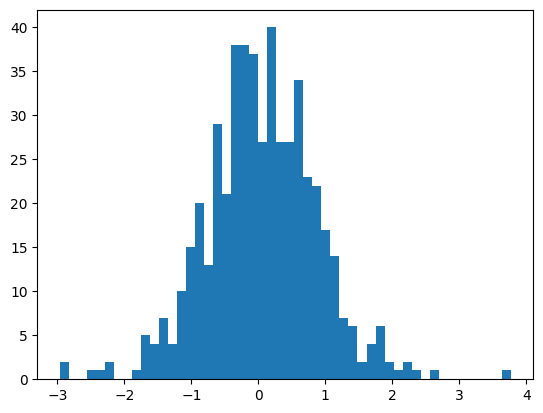

In [25]:
plt.hist(logScaled_partons[:,2, 1].flatten(), bins=50);

In [27]:
data_boost_reco.shape

torch.Size([512, 1, 4])

In [28]:
data_boost_reco

tensor([[[1820.3907,  -47.4695,  101.5890, -517.7108]],

        [[ 564.8938,   26.5264,  -20.7455,  367.7537]],

        [[ 663.1974,   50.0374,   47.0418, -457.8681]],

        ...,

        [[ 945.8765,   19.3962,   28.6992,  261.2088]],

        [[ 912.0062,    3.4007,   17.3744,  -15.5943]],

        [[1029.1724,    9.7418,  -31.4686, -488.0404]]])

In [31]:
mask_recoParticles = torch.cat((mask_jets, mask_lepton_reco, mask_met), dim=1)

In [39]:
(logScaled_reco * mask_recoParticles[:, :, None]).shape

torch.Size([512, 18, 7])

In [38]:
logScaled_reco[0]

tensor([[ 1.3550e+00, -2.2969e+00,  1.1719e+00,  8.0948e-03,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 9.8301e-01,  5.1632e-01,  8.0520e-02,  2.5482e-03,  2.1817e-01,
          0.0000e+00,  0.0000e+00],
        [ 8.0437e-01, -1.0313e+00, -1.5530e+00,  9.9951e-01,  0.0000e+00,
          0.0000e+00,  7.8469e-01],
        [ 7.7229e-01,  2.1719e-01, -1.0177e+00,  6.7676e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.3190e-01,  9.8694e-01,  4.8841e-01,  2.2717e-03,  2.1817e-01,
          0.0000e+00,  0.0000e+00],
        [-6.2079e-01,  1.9336e+00,  2.7135e-01,  1.6830e-02,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-8.1351e-01,  8.9091e-01,  1.1009e+00,  1.1620e-02,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.7268e-01,  2.5407e+00, -5.4359e-01,  5.8154e-01,  0.0000e+00,
          5.0341e-01,  0.0000e+00],
        [-1.1839e+00, -5.2505e-01, -6.4935e-01,  7.6855e-01,  2.1817e-01,
          0.0000e+00,  7.8469e-01],
        [ 

In [37]:
logScaled_reco = logScaled_reco[:,:,:-1]